# 美国2012年总统候选人政治献金数据分析

导入包

In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

方便大家操作，将月份和参选人以及所在政党进行定义

In [2]:
months = {'JAN' : 1, 'FEB' : 2, 'MAR' : 3, 'APR' : 4, 'MAY' : 5, 'JUN' : 6,
          'JUL' : 7, 'AUG' : 8, 'SEP' : 9, 'OCT': 10, 'NOV': 11, 'DEC' : 12}
of_interest = ['Obama, Barack', 'Romney, Mitt', 'Santorum, Rick', 
               'Paul, Ron', 'Gingrich, Newt']
parties = {
  'Bachmann, Michelle': 'Republican',
  'Romney, Mitt': 'Republican',
  'Obama, Barack': 'Democrat',
  "Roemer, Charles E. 'Buddy' III": 'Reform',
  'Pawlenty, Timothy': 'Republican',
  'Johnson, Gary Earl': 'Libertarian',
  'Paul, Ron': 'Republican',
  'Santorum, Rick': 'Republican',
  'Cain, Herman': 'Republican',
  'Gingrich, Newt': 'Republican',
  'McCotter, Thaddeus G': 'Republican',
  'Huntsman, Jon': 'Republican',
  'Perry, Rick': 'Republican'           
 }

读取文件

In [4]:
table = pd.read_csv('data/usa_election.txt')
table.head()

/Users/bobo/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


查看文件样式以及基本信息

In [4]:
table.shape

(536041, 16)

In [5]:
table.dtypes

cmte_id               object
cand_id               object
cand_nm               object
contbr_nm             object
contbr_city           object
contbr_st             object
contbr_zip            object
contbr_employer       object
contbr_occupation     object
contb_receipt_amt    float64
contb_receipt_dt      object
receipt_desc          object
memo_cd               object
memo_text             object
form_tp               object
file_num               int64
dtype: object

【知识点】使用map函数+字典，新建一列各个候选人所在党派party

In [7]:
table['party']=table['cand_nm'].map(parties)
table.head(1)

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


查看单独一行，是否加上了'party'一列

In [5]:
table.head(1)

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


使用np.unique()函数查看colums：party这一列中有哪些元素

In [7]:
table['party'].unique()

array(['Republican', 'Democrat', 'Reform', 'Libertarian'], dtype=object)

使用value_counts()函数，统计party列中各个元素出现次数

In [8]:
table['party'].value_counts()

Democrat       292400
Republican     237575
Reform           5364
Libertarian       702
Name: party, dtype: int64

【知识点】使用groupby()函数，查看各个党派收到的政治献金总数contb_receipt_amt

In [9]:
table.groupby('party').groups

{'Democrat': Int64Index([ 58829,  58830,  58831,  58832,  58833,  58834,  58835,  58836,
              58837,  58838,
             ...
             351219, 351220, 351221, 351222, 351223, 351224, 351225, 351226,
             351227, 351228],
            dtype='int64', length=292400),
 'Libertarian': Int64Index([361125, 361126, 361127, 361128, 361129, 361130, 361131, 361132,
             361133, 361134,
             ...
             361817, 361818, 361819, 361820, 361821, 361822, 361823, 361824,
             361825, 361826],
            dtype='int64', length=702),
 'Reform': Int64Index([351229, 351230, 351231, 351232, 351233, 351234, 351235, 351236,
             351237, 351238,
             ...
             356583, 356584, 356585, 356586, 356587, 356588, 356589, 356590,
             356591, 356592],
            dtype='int64', length=5364),
 'Republican': Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                  8,      9,
             ...
            

In [7]:
table.groupby('party')['contb_receipt_amt'].sum()

party
Democrat       8.105758e+07
Libertarian    4.132769e+05
Reform         3.390338e+05
Republican     1.192255e+08
Name: contb_receipt_amt, dtype: float64

查看具体每天各个党派收到的政治献金总数contb_receipt_amt  
使用groupby([多个分组参数])

In [14]:
table.head(1)

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


In [10]:
table.groupby(['contb_receipt_dt','party']).groups

{('25-SEP-11',
  'Reform'): Int64Index([353157, 354729, 354761, 355526, 356283, 356541], dtype='int64'),
 ('18-APR-11',
  'Reform'): Int64Index([351790, 351867, 353160, 353280, 353295, 354349, 354630, 355553,
             355790, 355997],
            dtype='int64'),
 ('13-AUG-11', 'Reform'): Int64Index([353165], dtype='int64'),
 ('27-JAN-12',
  'Republican'): Int64Index([   515,    913,    938,    994,    999,   1063,   1100,   1101,
               1152,   1160,
             ...
             506194, 506202, 506214, 506259, 506277, 506416, 522037, 526209,
             528301, 528361],
            dtype='int64', length=1110),
 ('03-NOV-11',
  'Republican'): Int64Index([   872,    879,   1021,   1286,   1448,   1543,   1550,   1595,
               1699,   1770,
             ...
             527991, 534841, 535066, 535067, 535068, 535069, 535070, 535085,
             535086, 535088],
            dtype='int64', length=1026),
 ('31-JUL-11',
  'Republican'): Int64Index([ 11854,  53144, 357856

In [8]:
table.groupby(['contb_receipt_dt','party'])['contb_receipt_amt'].sum()

contb_receipt_dt  party      
01-APR-11         Reform              50.00
                  Republican       12635.00
01-AUG-11         Democrat        175281.00
                  Libertarian       1000.00
                  Reform            1847.00
                  Republican      234598.46
01-DEC-11         Democrat        651532.82
                  Libertarian        725.00
                  Reform             875.00
                  Republican      486405.96
01-FEB-11         Republican         250.00
01-JAN-11         Republican        8600.00
01-JAN-12         Democrat         58098.80
                  Reform             515.00
                  Republican       75704.72
01-JUL-11         Democrat        165961.00
                  Libertarian       2000.00
                  Reform             100.00
                  Republican      115848.72
01-JUN-11         Democrat        145459.00
                  Libertarian        500.00
                  Reform              50.00
  

 查看日期格式，并将其转换为'yyyy-mm-dd'日期格式,通过函数加map方式进行转换:months['月份简写']==》mm形式的月份

In [9]:
# 20-JUN-11
def transform_date(date):
    day,mon,year = date.split('-')
    month = months[mon]
    return '20'+year + '-' + str(month) + '-' + day

In [10]:
table['contb_receipt_dt'] = table['contb_receipt_dt'].map(transform_date)

查看是否转换成功

In [11]:
table['contb_receipt_dt']

0          2011-6-20
1          2011-6-23
2          2011-7-05
3          2011-8-01
4          2011-6-20
5          2011-6-23
6          2011-6-21
7          2011-7-05
8          2011-6-21
9          2011-6-20
10         2011-6-22
11         2011-6-22
12         2011-6-21
13         2011-6-17
14         2011-7-11
15         2011-7-08
16         2011-7-05
17         2011-6-27
18         2011-6-13
19         2011-6-16
20         2011-6-16
21         2011-6-16
22         2011-6-17
23         2011-6-17
24         2011-7-18
25         2011-7-18
26         2011-8-05
27         2011-7-01
28         2011-7-05
29         2011-7-05
             ...    
536011     2011-9-30
536012     2011-9-30
536013     2011-9-30
536014     2011-9-30
536015     2011-9-30
536016     2011-9-30
536017     2011-9-30
536018     2011-9-30
536019     2011-9-30
536020     2011-9-29
536021    2011-11-15
536022    2011-10-29
536023    2011-11-12
536024    2011-11-30
536025     2011-8-17
536026     2011-8-26
536027    201

得到每天各政党所收政治献金数目。  

考察知识点：groupby（多个字段）

In [11]:
r1 = table.groupby(['contb_receipt_dt','party'])['contb_receipt_amt'].sum()

In [12]:
r1.head()

contb_receipt_dt  party      
01-APR-11         Reform             50.0
                  Republican      12635.0
01-AUG-11         Democrat       175281.0
                  Libertarian      1000.0
                  Reform           1847.0
Name: contb_receipt_amt, dtype: float64

【知识点】使用unstack()将上面所得数据中的party行索引变成列索引

In [22]:
r2 = r1.unstack(level=1).fillna(value=0)
r2.head()

party,Democrat,Libertarian,Reform,Republican
contb_receipt_dt,,,,
2011-1-01,0.0,0.0,0.0,8600.0
2011-1-03,0.0,0.0,0.0,4800.0
2011-1-04,0.0,0.0,0.0,5000.0
2011-1-12,0.0,0.0,0.0,4150.0
2011-1-13,0.0,0.0,0.0,4000.0


查看老兵(捐献者职业)DISABLED VETERAN主要支持谁  ：查看老兵们捐赠给谁的钱最多
考察Series索引

In [8]:
table['contbr_occupation'] == 'DISABLED VETERAN'

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
536011    False
536012    False
536013    False
536014    False
536015    False
536016    False
536017    False
536018    False
536019    False
536020    False
536021    False
536022    False
536023    False
536024    False
536025    False
536026    False
536027    False
536028    False
536029    False
536030    False
536031    False
536032    False
536033    False
536034    False
536035    False
536036    False
536037    False
536038    False
536039    False
536040    False
Name: contbr_occupation,

In [15]:
old_bing = table.loc[table['contbr_occupation'] == 'DISABLED VETERAN']
old_bing

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
149790,C00431445,P80003338,"Obama, Barack","MAHURIN, DAVID",TAMPA,FL,33616,VETERANS ADMINISTRATION,DISABLED VETERAN,10.00,17-JAN-12,NaN,NaN,NaN,SA17A,766535,Democrat
150910,C00431445,P80003338,"Obama, Barack","MAHURIN, DAVID",TAMPA,FL,33616,VETERANS ADMINISTRATION,DISABLED VETERAN,20.00,01-JAN-12,NaN,NaN,NaN,SA17A,766535,Democrat
174041,C00431445,P80003338,"Obama, Barack","KRUCHTEN, MICHAEL",ROCKFORD,IL,611146507,DISABLED,DISABLED VETERAN,50.00,02-DEC-11,NaN,NaN,NaN,SA17A,763233,Democrat
175244,C00431445,P80003338,"Obama, Barack","KRUCHTEN, MICHAEL",ROCKFORD,IL,611146507,DISABLED,DISABLED VETERAN,250.00,12-OCT-11,NaN,NaN,NaN,SA17A,763233,Democrat
183790,C00431445,P80003338,"Obama, Barack","BRYANT, J.L.",TOPEKA,KS,666121668,RET ARMY,DISABLED VETERAN,100.00,12-OCT-11,NaN,NaN,NaN,SA17A,763233,Democrat
184211,C00431445,P80003338,"Obama, Barack","BRYANT, J.L.",TOPEKA,KS,666121668,RET ARMY,DISABLED VETERAN,100.00,04-AUG-11,NaN,NaN,NaN,SA17A,756218,Democrat
184417,C00431445,P80003338,"Obama, Barack","BRYANT, J.L.",TOPEKA,KS,666121668,RET ARMY,DISABLED VETERAN,100.00,23-AUG-11,NaN,NaN,NaN,SA17A,756218,Democrat
184761,C00431445,P80003338,"Obama, Barack","BRYANT, J.L.",TOPEKA,KS,666121668,RET ARMY,DISABLED VETERAN,110.00,12-AUG-11,NaN,X,* OBAMA VICTORY FUND 2012,SA18,756218,Democrat
185140,C00431445,P80003338,"Obama, Barack","BAUER, JOSEPH",PROSPECT,KY,40059,NOT EMPLOYED,DISABLED VETERAN,85.00,08-JUL-11,NaN,NaN,NaN,SA17A,756218,Democrat
185264,C00431445,P80003338,"Obama, Barack","BAUER, JOSEPH",PROSPECT,KY,40059,NOT EMPLOYED,DISABLED VETERAN,100.00,08-JUL-11,NaN,NaN,NaN,SA17A,756218,Democrat


In [16]:
r3 = old_bing.groupby('cand_nm')['contb_receipt_amt'].sum()
r3

cand_nm
Cain, Herman       300.00
Obama, Barack     4205.00
Paul, Ron         2425.49
Santorum, Rick     250.00
Name: contb_receipt_amt, dtype: float64

把索引变成列,Series.reset_index()

In [50]:
r3.reset_index()

,cand_nm,contb_receipt_amt
0,"Cain, Herman",300.00
1,"Obama, Barack",4205.00
2,"Paul, Ron",2425.49
3,"Santorum, Rick",250.00


In [19]:
%matplotlib inline

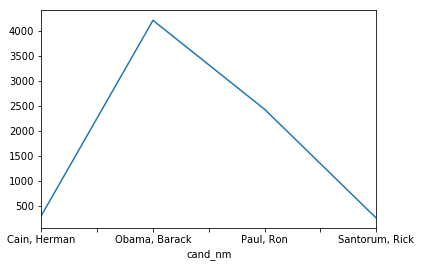

In [20]:
r3.plot()


找出各个候选人的捐赠者中，捐赠金额最大的人的职业以及捐献额  

通过query("查询条件来查找捐献人职业")

In [15]:
table['contb_receipt_amt'].max()

1944042.43

In [22]:
table.query("contb_receipt_amt == 1944042.43")

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
176127,C00431445,P80003338,"Obama, Barack",OBAMA VICTORY FUND 2012 - UNITEMIZED,CHICAGO,IL,60680,NaN,NaN,1944042.43,31-DEC-11,NaN,X,*,SA18,763233,Democrat
